<a href="https://colab.research.google.com/github/PrathameshBagal/Projects/blob/main/cse519_hw3_Bagal_Prathamesh_115612879.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### TOC
1. Anomalies in Data, and cleaning action & explaination. 15 pts
2. Pairwise Corralation Table and explaition. 10 pts
3. Average records stockID vs Day, 25 pts
    - a. autocorrelation, 10 pts
    - b. measure the distance, 5 pts
    - c. clustering algorithm, 10 pts
4. Closing trajectory of stocks on each day highly correlated, 25 pts
   - a. Make three plots, 10 pts
   - b. permutation test to determine the statistical confidence, 15 pts
      p-value
5. Best prediction model, any approaches, 25 pts
6. submit model on Kaggle, 0 pts

#### Start
- Copy this notebook.
  In Google Colab use `File -> Save a Copy in Drive`.
- Use the "Text" blocks to provide explanations wherever you find them necessary.
- Highlight your answers inside these text fields to ensure that we don't miss it
while grading your HW.

#### Setup

- Code to download the data directly from the colab notebook.
- If you find it easier to download the data from the kaggle website (and
uploading it to your drive), you can skip this section.

In [3]:
## First mount your drive before running analysis code
from google.colab import drive
drive.mount('/content/drive')

## Create a folder for the this HW and change to that dir
%cd drive/MyDrive/cse519hw3


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/cse519hw3


In [ ]:
## packages
!pip install -q kaggle
!pip install -q pandas
!pip install -q scikit-learn
!pip install -q numpy
!pip install -q Matplotlib
!pip install -q seaborn


In [ ]:
## Upload the file by clicking on the browse
from google.colab import files
files.upload()

## Create a new API token under "Account" in the kaggle webpage and download the json file

Saving kaggle.json to kaggle (2).json


{'kaggle (2).json': b'{"username":"prathameshbagal2908","key":"aeb262bba67aa035274dbdbeb018df79"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle competitions download -c optiver-trading-at-the-close
!unzip optiver-trading-at-the-close.zip
!ls

optiver-trading-at-the-close.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  optiver-trading-at-the-close.zip
replace example_test_files/revealed_targets.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename:  example_test_files   kaggle.json			 public_timeseries_testing_util.py
'kaggle (1).json'     optiver2023			 train.csv
'kaggle (2).json'     optiver-trading-at-the-close.zip


#### Q1: Anomalies and Cleaning, 15 pts


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

col_names = [
  "stock_id",
  "date_id",
  "seconds_in_bucket",
  "imbalance_size",
  "imbalance_buy_sell_flag",
  "reference_price",
  "matched_size",
  "far_price",
  "near_price",
  "bid_price",
  "bid_size",
  "ask_price",
  "ask_size",
  "wap",
  "target",
  "time_id",
  "row_id"
]
dtypes = {
  "stock_id": int,
  "date_id":int,
  "seconds_in_bucket":int,
  "imbalance_size":np.float64,
  "imbalance_buy_sell_flag":int,
  "reference_price":np.float64,
  "matched_size":np.float64,
  "far_price":np.float64,
  "near_price":np.float64,
  "bid_price":np.float64,
  "bid_size":np.float64,
  "ask_price":np.float64,
  "ask_size":np.float64,
  "wap":np.float64,
  "target":np.float64,
  "time_id":int,
  "row_id": "string",
}
csv = pd.read_csv("train.csv")


In [5]:
csv

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,1.000000,-3.029704,0,0_0_0
1,1,0,0,166603.91,-1,0.999896,1642214.25,NaN,NaN,0.999896,3233.04,1.000660,20605.09,1.000000,-5.519986,0,0_0_1
2,2,0,0,302879.87,-1,0.999561,1819368.03,NaN,NaN,0.999403,37956.00,1.000298,18995.00,1.000000,-8.389950,0,0_0_2
3,3,0,0,11917682.27,-1,1.000171,18389745.62,NaN,NaN,0.999999,2324.90,1.000214,479032.40,1.000000,-4.010200,0,0_0_3
4,4,0,0,447549.96,-1,0.999532,17860614.95,NaN,NaN,0.999394,16485.54,1.000016,434.10,1.000000,-7.349849,0,0_0_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5237975,195,480,540,2440722.89,-1,1.000317,28280361.74,0.999734,0.999734,1.000317,32257.04,1.000434,319862.40,1.000328,2.310276,26454,480_540_195
5237976,196,480,540,349510.47,-1,1.000643,9187699.11,1.000129,1.000386,1.000643,205108.40,1.000900,93393.07,1.000819,-8.220077,26454,480_540_196
5237977,197,480,540,0.00,0,0.995789,12725436.10,0.995789,0.995789,0.995789,16790.66,0.995883,180038.32,0.995797,1.169443,26454,480_540_197
5237978,198,480,540,1000898.84,1,0.999210,94773271.05,0.999210,0.999210,0.998970,125631.72,0.999210,669893.00,0.999008,-1.540184,26454,480_540_198


In [6]:
df = csv.copy()

In [7]:
#  Calculating the number of missing values
df.isna().sum().sort_values(ascending=False)

far_price                  2894342
near_price                 2857180
ask_price                      220
imbalance_size                 220
reference_price                220
matched_size                   220
wap                            220
bid_price                      220
target                          88
time_id                          0
ask_size                         0
stock_id                         0
bid_size                         0
date_id                          0
imbalance_buy_sell_flag          0
seconds_in_bucket                0
row_id                           0
dtype: int64

*   As we can see, there are a lot of missing values in the dataset. We need to deal with them first before we start any preprocessing or modelling as a lot of functions will throw an error because of these missing values.

*   It is clear that there are 6 columns that have the equal number of missing values (220) . I have a feeling that they are all associated with the same rows, so I will remove them first.

*   I will deal with missing imbalance values for that.









In [8]:
miss_imbalance = df[df.imbalance_size.isna()]
print("The stock_id for missing values are :")
set(miss_imbalance["stock_id"])

The stock_id for missing values are :


{19, 101, 131, 158}

In [9]:
stock_id_19 = df[df.stock_id == 19]
stock_id_19[stock_id_19.imbalance_size.isna()].head()

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
4764999,19,438,0,NaN,-1,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.00,NaN,NaN,24090,438_0_19
4765199,19,438,10,NaN,-1,NaN,NaN,NaN,NaN,NaN,993.4,NaN,3776.44,NaN,3.800392,24091,438_10_19
4765399,19,438,20,NaN,-1,NaN,NaN,NaN,NaN,NaN,993.4,NaN,3776.44,NaN,0.220537,24092,438_20_19
4765599,19,438,30,NaN,-1,NaN,NaN,NaN,NaN,NaN,15097.4,NaN,3974.80,NaN,-1.299977,24093,438_30_19
4765799,19,438,40,NaN,-1,NaN,NaN,NaN,NaN,NaN,15494.7,NaN,4173.54,NaN,-1.900196,24094,438_40_19




*   After checking for stock id 19, the output shows that certain rows have missing values for all columns. These are rows which will be useless to us a they have mostly NaN values in all their columns.
*   This is the reason I will be removing these rows.



In [10]:
df = df.dropna(subset=["imbalance_size"], axis=0)
df.isna().sum().sort_values(ascending=False)


far_price                  2894122
near_price                 2856960
bid_price                        0
time_id                          0
target                           0
wap                              0
ask_size                         0
ask_price                        0
bid_size                         0
stock_id                         0
date_id                          0
matched_size                     0
reference_price                  0
imbalance_buy_sell_flag          0
imbalance_size                   0
seconds_in_bucket                0
row_id                           0
dtype: int64

In [11]:
df

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,1.000000,-3.029704,0,0_0_0
1,1,0,0,166603.91,-1,0.999896,1642214.25,NaN,NaN,0.999896,3233.04,1.000660,20605.09,1.000000,-5.519986,0,0_0_1
2,2,0,0,302879.87,-1,0.999561,1819368.03,NaN,NaN,0.999403,37956.00,1.000298,18995.00,1.000000,-8.389950,0,0_0_2
3,3,0,0,11917682.27,-1,1.000171,18389745.62,NaN,NaN,0.999999,2324.90,1.000214,479032.40,1.000000,-4.010200,0,0_0_3
4,4,0,0,447549.96,-1,0.999532,17860614.95,NaN,NaN,0.999394,16485.54,1.000016,434.10,1.000000,-7.349849,0,0_0_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5237975,195,480,540,2440722.89,-1,1.000317,28280361.74,0.999734,0.999734,1.000317,32257.04,1.000434,319862.40,1.000328,2.310276,26454,480_540_195
5237976,196,480,540,349510.47,-1,1.000643,9187699.11,1.000129,1.000386,1.000643,205108.40,1.000900,93393.07,1.000819,-8.220077,26454,480_540_196
5237977,197,480,540,0.00,0,0.995789,12725436.10,0.995789,0.995789,0.995789,16790.66,0.995883,180038.32,0.995797,1.169443,26454,480_540_197
5237978,198,480,540,1000898.84,1,0.999210,94773271.05,0.999210,0.999210,0.998970,125631.72,0.999210,669893.00,0.999008,-1.540184,26454,480_540_198




*   As we can see we have removed the missing values for most columns by removing certain bad rows that accounted for most of the missing values.
*   One interesting thing is the huge number of missing values for far and near price.

*   The number of missing values in far and near price is unusually high. Seeing some missing values like we saw in imbalance_size and other columns is understandable. But 2.8 million missing values shows that there is a pattern and a reason for the unusually high number of missing values.








*   In this section I will deal with the far and near price columns and try and prepare the data by dealing with the Nan values in these 2 columns
*   Far and near prices are variables which are calculated throughout the auction at different intervals.


*   Given the 2.8 million missing values, I believe that the data might be missing for a part of the auction.
*   To verify that, I will try and find the seconds_in_bucket values where far and near prices are available.





In [12]:
# calculating seconds_in_bucket values where there are some valid far price values available.
df[~df.far_price.isna()].seconds_in_bucket.unique()

array([300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420,
       430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540])

In [13]:
# calculating seconds_in_bucket values where there are some valid near price values vailable.
df[~df.near_price.isna()].seconds_in_bucket.unique()

array([300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420,
       430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540])



*   The outputs show that the seconds_in_bucket values where non null far and near price values are available are >= 300.
*   I will now verify this by calculating the non null far and near price for all rows where seconds_in_bucket < 300.




In [14]:
df_before_300 = df.loc[df["seconds_in_bucket"] < 300]

print(f"Total rows where seconds_in_bucket < 300 are {len(df_before_300)}")
print(f"Total non null values per column where seconds_in_bucket < 300: \n{df_before_300.notna().sum()}")

Total rows where seconds_in_bucket < 300 are 2856960
Total non null values per column where seconds_in_bucket < 300: 
stock_id                   2856960
date_id                    2856960
seconds_in_bucket          2856960
imbalance_size             2856960
imbalance_buy_sell_flag    2856960
reference_price            2856960
matched_size               2856960
far_price                        0
near_price                       0
bid_price                  2856960
bid_size                   2856960
ask_price                  2856960
ask_size                   2856960
wap                        2856960
target                     2856960
time_id                    2856960
row_id                     2856960
dtype: int64


* As we can see, there are 0 non null far and near price values where seconds_in_bucket < 300.

*   This shows us that the dataset does not contain valid far_price and near_price values for the first 5 minutes of the auction.
* We can conclude that the far_price and near_price as useless for prediction in the first 5 minutes of the auction.




In [15]:
df_after_300 = df.loc[df["seconds_in_bucket"] >= 300 ]
print(f"The number of null values when seconds_in_bucket >= 300 \n{df_after_300.isna().sum()}")

The number of null values when seconds_in_bucket >= 300 
stock_id                       0
date_id                        0
seconds_in_bucket              0
imbalance_size                 0
imbalance_buy_sell_flag        0
reference_price                0
matched_size                   0
far_price                  37162
near_price                     0
bid_price                      0
bid_size                       0
ask_price                      0
ask_size                       0
wap                            0
target                         0
time_id                        0
row_id                         0
dtype: int64


* After this block we see that when seconds_in_bucket >= 300, the only column with null values is far_price.
* This means that almost half the rows in the dataset have a null value in the far_price column.
* This makes it tempting to delete the entire column altogether.
* After speaking with the instructors on piazza, I am leaning towards keeping the column and substituting the null values with the mean calculated from the non null values in the column.
* I will be doing the same for near_price values.

In [16]:
df

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,1.000000,-3.029704,0,0_0_0
1,1,0,0,166603.91,-1,0.999896,1642214.25,NaN,NaN,0.999896,3233.04,1.000660,20605.09,1.000000,-5.519986,0,0_0_1
2,2,0,0,302879.87,-1,0.999561,1819368.03,NaN,NaN,0.999403,37956.00,1.000298,18995.00,1.000000,-8.389950,0,0_0_2
3,3,0,0,11917682.27,-1,1.000171,18389745.62,NaN,NaN,0.999999,2324.90,1.000214,479032.40,1.000000,-4.010200,0,0_0_3
4,4,0,0,447549.96,-1,0.999532,17860614.95,NaN,NaN,0.999394,16485.54,1.000016,434.10,1.000000,-7.349849,0,0_0_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5237975,195,480,540,2440722.89,-1,1.000317,28280361.74,0.999734,0.999734,1.000317,32257.04,1.000434,319862.40,1.000328,2.310276,26454,480_540_195
5237976,196,480,540,349510.47,-1,1.000643,9187699.11,1.000129,1.000386,1.000643,205108.40,1.000900,93393.07,1.000819,-8.220077,26454,480_540_196
5237977,197,480,540,0.00,0,0.995789,12725436.10,0.995789,0.995789,0.995789,16790.66,0.995883,180038.32,0.995797,1.169443,26454,480_540_197
5237978,198,480,540,1000898.84,1,0.999210,94773271.05,0.999210,0.999210,0.998970,125631.72,0.999210,669893.00,0.999008,-1.540184,26454,480_540_198


In [17]:
#  Calculating mean for far_price
non_null_far_price = df.loc[df["far_price"].isna()==False]
far_price_mean = non_null_far_price.far_price.mean()
far_price_mean

1.0017128691026518

In [18]:
#  Calculating mean for near_price
non_null_near_price = df.loc[df["near_price"].isna()==False]
near_price_mean = non_null_near_price.near_price.mean()
near_price_mean

0.99966010606813

In [19]:
# Substituting null values with mean values for far_price and near_price.
df_without_na = df.copy()
df_without_na.far_price.fillna(far_price_mean, inplace = True)
df_without_na.near_price.fillna(near_price_mean, inplace = True)
df_without_na.drop(columns="row_id",inplace=True)
df_without_na

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,1.001713,0.999660,0.999812,60651.50,1.000026,8493.03,1.000000,-3.029704,0
1,1,0,0,166603.91,-1,0.999896,1642214.25,1.001713,0.999660,0.999896,3233.04,1.000660,20605.09,1.000000,-5.519986,0
2,2,0,0,302879.87,-1,0.999561,1819368.03,1.001713,0.999660,0.999403,37956.00,1.000298,18995.00,1.000000,-8.389950,0
3,3,0,0,11917682.27,-1,1.000171,18389745.62,1.001713,0.999660,0.999999,2324.90,1.000214,479032.40,1.000000,-4.010200,0
4,4,0,0,447549.96,-1,0.999532,17860614.95,1.001713,0.999660,0.999394,16485.54,1.000016,434.10,1.000000,-7.349849,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5237975,195,480,540,2440722.89,-1,1.000317,28280361.74,0.999734,0.999734,1.000317,32257.04,1.000434,319862.40,1.000328,2.310276,26454
5237976,196,480,540,349510.47,-1,1.000643,9187699.11,1.000129,1.000386,1.000643,205108.40,1.000900,93393.07,1.000819,-8.220077,26454
5237977,197,480,540,0.00,0,0.995789,12725436.10,0.995789,0.995789,0.995789,16790.66,0.995883,180038.32,0.995797,1.169443,26454
5237978,198,480,540,1000898.84,1,0.999210,94773271.05,0.999210,0.999210,0.998970,125631.72,0.999210,669893.00,0.999008,-1.540184,26454


* As we can see, after substituting the null values for far and near price with their respective means, there are no null values in the entire dataset.

In [20]:
df_without_na.isna().sum()

stock_id                   0
date_id                    0
seconds_in_bucket          0
imbalance_size             0
imbalance_buy_sell_flag    0
reference_price            0
matched_size               0
far_price                  0
near_price                 0
bid_price                  0
bid_size                   0
ask_price                  0
ask_size                   0
wap                        0
target                     0
time_id                    0
dtype: int64

**Summary Q1**

* First thing I did was calculate the number of null values per column in the entire dataset.
* This was interesting as there were 6 columns with an equal number (220) of null values in them.
* This equal number gave me a feeling that all these null values were due to certain rows missing values for all the columns.
* My intuition turned out to be true. After removing such rows, the number of null values for all but 2 columns was 0.
* Those 2 columns were far_price and near_price.
* They both had 2.8 million null values each. That was almost half the dataset.
* This massive number indicated that there was some pattern. On further analysis, I discovered that all rows in the first 5 minutes of the auction had null values for far_price and near_price.
* After the first 5 mins,the only column with null values was far_price.
* I considered removing the column, but there was a chance that for the last 5 mins maybe the column indicated some pattern.
* This is why I decided to substitute the null values in far_price and near_price with their respective mean_values so we do not lose their potential insights for the last 5 mins of the auction.

#### Q2: Pairwise Corralation Table and Explaition. 10 pts


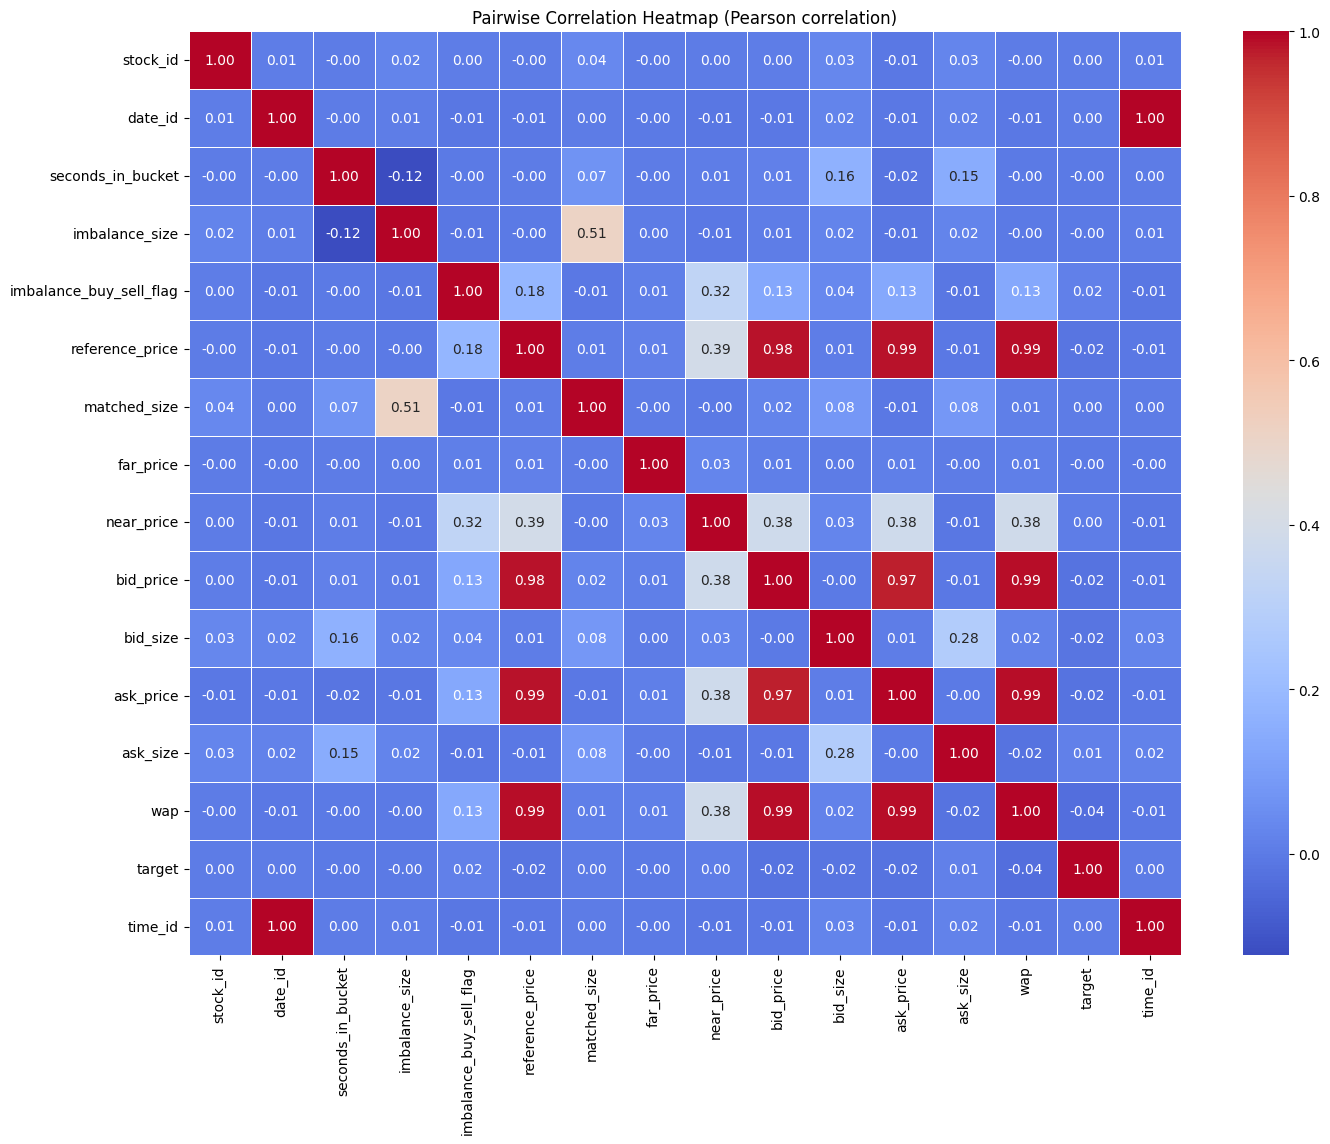

In [19]:
pairwise_correlation = df_without_na.corr(method='pearson')

plt.figure(figsize=(16, 12))
sns.heatmap(pairwise_correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Pairwise Correlation Heatmap (Pearson correlation)')
plt.show()

**There are certain variables that have extremely high correlation with each other.They are:**


1.   date_id and time_id: These columns have perfect correlation(1). This is pretty obvious because they both indicate the exact same thing (time) but in different formats.
2.   bid_price and reference_price: Bid price is the most competitive buy price in the non auction book (the highest buy offer <= reference price). Since it is the closest values to the reference price on the buy side, the almost perfect correlation (0.98) makes sense.
3. ask_price and reference_price: Ask price is the most competitive (closest) sell order that is >= reference price. Hence the correlation of 0.99 is logical as these values are seperated by very small amounts.
4. bid_price and ask_price: These are the closest buy/sell orders on either side of the reference price and are hence extremely similar to each other. This is why their correlation(0.97) which is less than their individual correlation with reference_price would be justifiable because they are on the either side of reference_price and hence their gap would be bigger than their individual gaps to reference_price.
5. wap and ask_price/bid_price: From the google doc description of the data, we know that wap is calculated using the bid_price, ask_price and bid/ask size. wap has almost 0 correlation to the sizes, hence it makes total sense that it has almost perfect correlation(0.99) with both bid_price and ask_price.


 **There are some other correlations that are noteworthy.**
* These cannot be classified as high correlations but looked interesting to me hence I will talk about them.
1. matched_size and imbalance_size: According to the description in the hw 3 doc:
  * imbalance_size: The amount unmatched at the current reference price (in USD) and
  * matched_size: The amount that can be matched at the current reference price (in USD).
  * These two by definition are completely opposite to each other but have a correlation of 0.51. I expected them to have a negative correlation.
  * This is why I feel this was a noteworthy observation.
2. near_price and (wap,bid_price,ask_price,imbalance_buy_sell_flag): near_price has somewhat weak to moderate correlation with these values.  
 * All these values are very close to 1 and this could be the reason they have some correlation.
 * But then it occured to me that even far_price is always close to 1 but does not have any correlation with any of these values.
 * This is why I feel that the near_price variable is an interesting one.

3. One thing that I noted was that target had no correlation with any of the variables which is slightly concerning as that is what we are trying to predict by using all these other variables.

In [20]:
final_df = df_without_na.copy()
final_df

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,1.001713,0.999660,0.999812,60651.50,1.000026,8493.03,1.000000,-3.029704,0
1,1,0,0,166603.91,-1,0.999896,1642214.25,1.001713,0.999660,0.999896,3233.04,1.000660,20605.09,1.000000,-5.519986,0
2,2,0,0,302879.87,-1,0.999561,1819368.03,1.001713,0.999660,0.999403,37956.00,1.000298,18995.00,1.000000,-8.389950,0
3,3,0,0,11917682.27,-1,1.000171,18389745.62,1.001713,0.999660,0.999999,2324.90,1.000214,479032.40,1.000000,-4.010200,0
4,4,0,0,447549.96,-1,0.999532,17860614.95,1.001713,0.999660,0.999394,16485.54,1.000016,434.10,1.000000,-7.349849,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5237975,195,480,540,2440722.89,-1,1.000317,28280361.74,0.999734,0.999734,1.000317,32257.04,1.000434,319862.40,1.000328,2.310276,26454
5237976,196,480,540,349510.47,-1,1.000643,9187699.11,1.000129,1.000386,1.000643,205108.40,1.000900,93393.07,1.000819,-8.220077,26454
5237977,197,480,540,0.00,0,0.995789,12725436.10,0.995789,0.995789,0.995789,16790.66,0.995883,180038.32,0.995797,1.169443,26454
5237978,198,480,540,1000898.84,1,0.999210,94773271.05,0.999210,0.999210,0.998970,125631.72,0.999210,669893.00,0.999008,-1.540184,26454


#### Q3: Average records stockID vs Day, 25 pts
distance function between entries
- a. autocorrelation, 10 pts
- b. measure the distance, 5 pts
- c. clustering algorithm, 10 pts



Creating an average record for each stock on each date.



*   In order to come up with a consensus data for each stock on each day, I have calculated the mean of the features I feel are useful for our autocorrelation calculation.

*   imbalance_size and imbalance_buy_sell_flag: These will give us an idea about the direction and magnitude of the imbalance.

* reference_price and matched_size: These will give us the best price where most of the imbalance can be reduced by maximizing the matches.
* [bid/ask]_price and [bid/ask]_size: These will give us info about the current supply and availability of the stock.



In [28]:
average_records = final_df.groupby(['stock_id',"date_id"])["imbalance_size","reference_price","matched_size","bid_price","bid_size","wap","ask_size","ask_price"].mean().reset_index()
average_records

<ipython-input-28-ac40678751b9>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  average_records = final_df.groupby(['stock_id',"date_id"])["imbalance_size","reference_price","matched_size","bid_price","bid_size","wap","ask_size","ask_price"].mean().reset_index()


,stock_id,date_id,imbalance_size,reference_price,matched_size,bid_price,bid_size,wap,ask_size,ask_price
0,0,0,1.229794e+06,0.999664,2.064913e+07,0.999547,36503.148364,0.999618,34108.372182,0.999697
1,0,1,1.175555e+06,0.999050,9.342939e+06,0.998903,39277.045455,0.999000,25393.018909,0.999091
2,0,2,1.593084e+04,0.998940,1.306975e+07,0.998895,34400.522909,0.998962,37903.561091,0.999039
3,0,3,5.396968e+06,0.998883,1.414532e+07,0.998834,45016.867818,0.998919,75358.912364,0.999015
4,0,4,4.132774e+06,1.000689,1.882983e+07,1.000637,31768.836727,1.000755,56905.171818,1.000925
...,...,...,...,...,...,...,...,...,...,...
95227,199,476,2.294683e+06,1.000570,2.089265e+07,1.000291,83208.703818,1.000444,93354.227818,1.000614
95228,199,477,3.827352e+06,0.997992,1.337857e+07,0.997940,62637.859818,0.998099,62630.512364,0.998261
95229,199,478,1.095057e+06,1.000950,1.080398e+07,1.000662,75990.765818,1.000838,67328.337273,1.000982
95230,199,479,2.343566e+06,1.002252,2.773323e+07,1.002079,91019.942000,1.002288,50871.530364,1.002402


In [32]:
from itertools import product
from scipy.spatial.distance import euclidean
from scipy import stats

Defining a distance function.


1.   I have opted for the simple euclidean distance for the same.




In [30]:
res={}
for stock_id in df["stock_id"].unique():
  stock_row = average_records[average_records["stock_id"]==stock_id].sort_values("date_id")
  dist = []
  for lag in range(-10,11):
    if lag==0:continue # Dist will always be 0 for lag=0
    shift_data= stock_row.shift(lag).dropna()
    curr_data = stock_row.loc[shift_data.index]

    curr_dist= np.mean([euclidean(row1[1:],row2[1:]) for row1, row2 in zip(curr_data.iloc[:, 2:].values, shift_data.iloc[:, 2:].values)])
    dist.append(curr_dist)
  autocorrelation = pd.Series(dist).autocorr(lag=1)
  res[stock_id] = autocorrelation



In [34]:
autocorrelation_df = pd.DataFrame(list(res.items()),columns=["stock_id","autocorrelation"])
autocorrelation_df

,stock_id,autocorrelation
0,0,0.010732
1,1,0.712507
2,2,0.691839
3,3,0.600027
4,4,0.832385
...,...,...
195,153,0.888115
196,199,0.659892
197,79,0.786762
198,135,0.053643


In [49]:
autocorrelation_avg = autocorrelation_df["autocorrelation"].mean()
print("Average autocorrelation per stock is ",autocorrelation_avg)

Average autocorrelation per stock is  0.5951067450335694


The question also asks me if there is a significant autocorrelation in the market. For me to be able to comment on that, I will do a t test with the null hypothesis that the autocrrelation in the market is 0.

In [55]:
t_val, p_val =stats.ttest_1samp(autocorrelation_df["autocorrelation"],0)
print("P values is ",p_val)

P values is  5.497006085798823e-81


After the t test I can conclude that there is a significant amount of autocorrelation in the market. My evidence for that is the p value which is almost 0.

* To detect stocks with unusual autocorrelation, we will choose the stocks with autocorrelation more than 2 std dev away from the mean as this will have stocks that are a small subset and can be potential outliers as well.

In [56]:
autocorrelation_std_dev = autocorrelation_df["autocorrelation"].std()
highly_correlated_stocks = autocorrelation_df[np.abs(autocorrelation_df["autocorrelation"] - autocorrelation_avg) > 2*autocorrelation_std_dev]
highly_correlated_stocks = list(highly_correlated_stocks["stock_id"])
print("Stocks that have unusual autocorrelation values are :",highly_correlated_stocks )

Stocks that have unusual autocorrelation values are : [0, 29, 35, 48, 71, 77, 83, 88, 94, 147, 148, 183, 135]


3b

3b asks me to find the distance between all pairs of stocks on each day and then identify stocks that are unusually similar to each other.

In [57]:
from tqdm import tqdm

In [59]:
pair_dist={}

for date_id in tqdm(average_records["date_id"].unique()):
  date_row = average_records[average_records["date_id"]==date_id]
  dist={}

  for i, row1 in date_row.iterrows():
    for j, row2 in date_row.iterrows():
      if i<j:
        stock_1,stock_2 =row1["stock_id"], row2["stock_id"]
        curr_dist= euclidean(row1[2:],row2[2:])
        dist[(stock_1,stock_2)]= curr_dist
  pair_dist[date_id] = dist


100%|██████████| 481/481 [35:03<00:00,  4.37s/it]


In [60]:
pair_dist_df = pd.DataFrame(pair_dist)

avg_dist = pair_dist_df.mean(axis=1)
std_dev_dist = pair_dist_df.std(axis=1)

avg_threshold = avg_dist.quantile(0.1)
std_dev_threshold = std_dev_dist.quantile(0.1)

low_dist_pair = avg_dist[avg_dist< avg_threshold]
low_std_dev_pair = std_dev_dist[std_dev_dist< std_dev_threshold]

similar_pairs = low_dist_pair.index.intersection(low_std_dev_pair.index)

In [63]:
print("the pairs which are similar are:",list(similar_pairs))

the pairs which are similar are: [(1.0, 21.0), (1.0, 31.0), (1.0, 33.0), (1.0, 43.0), (1.0, 47.0), (1.0, 61.0), (1.0, 62.0), (1.0, 63.0), (1.0, 70.0), (1.0, 76.0), (1.0, 80.0), (1.0, 82.0), (1.0, 90.0), (1.0, 93.0), (1.0, 94.0), (1.0, 97.0), (1.0, 98.0), (1.0, 106.0), (1.0, 111.0), (1.0, 117.0), (1.0, 119.0), (1.0, 122.0), (1.0, 129.0), (1.0, 134.0), (1.0, 136.0), (1.0, 143.0), (1.0, 146.0), (1.0, 158.0), (1.0, 173.0), (1.0, 180.0), (1.0, 181.0), (1.0, 192.0), (1.0, 196.0), (5.0, 49.0), (6.0, 10.0), (6.0, 16.0), (6.0, 19.0), (6.0, 21.0), (6.0, 26.0), (6.0, 32.0), (6.0, 43.0), (6.0, 49.0), (6.0, 51.0), (6.0, 61.0), (6.0, 62.0), (6.0, 63.0), (6.0, 64.0), (6.0, 73.0), (6.0, 76.0), (6.0, 90.0), (6.0, 93.0), (6.0, 94.0), (6.0, 97.0), (6.0, 106.0), (6.0, 120.0), (6.0, 122.0), (6.0, 128.0), (6.0, 134.0), (6.0, 146.0), (6.0, 165.0), (6.0, 169.0), (6.0, 170.0), (6.0, 173.0), (6.0, 181.0), (6.0, 182.0), (6.0, 188.0), (6.0, 192.0), (6.0, 196.0), (6.0, 197.0), (10.0, 16.0), (10.0, 26.0), (10.0, 43

In [ ]:
#  the pairs which are similar are: [(1.0, 21.0), (1.0, 31.0), (1.0, 33.0), (1.0, 43.0), (1.0, 47.0), (1.0, 61.0), (1.0, 62.0), (1.0, 63.0), (1.0, 70.0), (1.0, 76.0), (1.0, 80.0), (1.0, 82.0), (1.0, 90.0), (1.0, 93.0), (1.0, 94.0), (1.0, 97.0), (1.0, 98.0), (1.0, 106.0), (1.0, 111.0), (1.0, 117.0), (1.0, 119.0), (1.0, 122.0), (1.0, 129.0), (1.0, 134.0), (1.0, 136.0), (1.0, 143.0), (1.0, 146.0), (1.0, 158.0), (1.0, 173.0), (1.0, 180.0), (1.0, 181.0), (1.0, 192.0), (1.0, 196.0), (5.0, 49.0), (6.0, 10.0), (6.0, 16.0), (6.0, 19.0), (6.0, 21.0), (6.0, 26.0), (6.0, 32.0), (6.0, 43.0), (6.0, 49.0), (6.0, 51.0), (6.0, 61.0), (6.0, 62.0), (6.0, 63.0), (6.0, 64.0), (6.0, 73.0), (6.0, 76.0), (6.0, 90.0), (6.0, 93.0), (6.0, 94.0), (6.0, 97.0), (6.0, 106.0), (6.0, 120.0), (6.0, 122.0), (6.0, 128.0), (6.0, 134.0), (6.0, 146.0), (6.0, 165.0), (6.0, 169.0), (6.0, 170.0), (6.0, 173.0), (6.0, 181.0), (6.0, 182.0), (6.0, 188.0), (6.0, 192.0), (6.0, 196.0), (6.0, 197.0), (10.0, 16.0), (10.0, 26.0), (10.0, 43.0), (10.0, 63.0), (10.0, 106.0), (10.0, 122.0), (10.0, 132.0), (10.0, 164.0), (10.0, 165.0), (10.0, 169.0), (10.0, 170.0), (10.0, 181.0), (10.0, 182.0), (16.0, 19.0), (16.0, 21.0), (16.0, 26.0), (16.0, 27.0), (16.0, 32.0), (16.0, 40.0), (16.0, 43.0), (16.0, 49.0), (16.0, 51.0), (16.0, 61.0), (16.0, 62.0), (16.0, 63.0), (16.0, 64.0), (16.0, 73.0), (16.0, 76.0), (16.0, 90.0), (16.0, 93.0), (16.0, 94.0), (16.0, 97.0), (16.0, 101.0), (16.0, 106.0), (16.0, 117.0), (16.0, 119.0), (16.0, 120.0), (16.0, 122.0), (16.0, 128.0), (16.0, 132.0), (16.0, 134.0), (16.0, 136.0), (16.0, 146.0), (16.0, 161.0), (16.0, 164.0), (16.0, 165.0), (16.0, 167.0), (16.0, 169.0), (16.0, 170.0), (16.0, 173.0), (16.0, 181.0), (16.0, 182.0), (16.0, 188.0), (16.0, 192.0), (16.0, 196.0), (16.0, 197.0), (19.0, 21.0), (19.0, 40.0), (19.0, 43.0), (19.0, 61.0), (19.0, 62.0), (19.0, 63.0), (19.0, 64.0), (19.0, 76.0), (19.0, 90.0), (19.0, 93.0), (19.0, 94.0), (19.0, 97.0), (19.0, 106.0), (19.0, 122.0), (19.0, 134.0), (19.0, 165.0), (19.0, 173.0), (19.0, 181.0), (19.0, 182.0), (19.0, 192.0), (19.0, 196.0), (20.0, 132.0), (20.0, 164.0), (20.0, 169.0), (20.0, 170.0), (21.0, 31.0), (21.0, 40.0), (21.0, 43.0), (21.0, 51.0), (21.0, 61.0), (21.0, 62.0), (21.0, 63.0), (21.0, 64.0), (21.0, 70.0), (21.0, 76.0), (21.0, 80.0), (21.0, 82.0), (21.0, 90.0), (21.0, 93.0), (21.0, 94.0), (21.0, 97.0), (21.0, 98.0), (21.0, 100.0), (21.0, 101.0), (21.0, 106.0), (21.0, 111.0), (21.0, 117.0), (21.0, 119.0), (21.0, 122.0), (21.0, 124.0), (21.0, 125.0), (21.0, 128.0), (21.0, 129.0), (21.0, 134.0), (21.0, 136.0), (21.0, 138.0), (21.0, 143.0), (21.0, 145.0), (21.0, 146.0), (21.0, 161.0), (21.0, 165.0), (21.0, 173.0), (21.0, 180.0), (21.0, 181.0), (21.0, 182.0), (21.0, 188.0), (21.0, 192.0), (21.0, 196.0), (26.0, 32.0), (26.0, 43.0), (26.0, 49.0), (26.0, 63.0), (26.0, 64.0), (26.0, 76.0), (26.0, 90.0), (26.0, 93.0), (26.0, 97.0), (26.0, 106.0), (26.0, 122.0), (26.0, 128.0), (26.0, 134.0), (26.0, 165.0), (26.0, 167.0), (26.0, 169.0), (26.0, 170.0), (26.0, 181.0), (26.0, 182.0), (26.0, 192.0), (26.0, 196.0), (26.0, 197.0), (27.0, 49.0), (27.0, 55.0), (27.0, 132.0), (27.0, 164.0), (27.0, 169.0), (27.0, 170.0), (30.0, 73.0), (30.0, 114.0), (30.0, 117.0), (31.0, 47.0), (31.0, 61.0), (31.0, 62.0), (31.0, 70.0), (31.0, 76.0), (31.0, 80.0), (31.0, 82.0), (31.0, 90.0), (31.0, 93.0), (31.0, 94.0), (31.0, 97.0), (31.0, 98.0), (31.0, 101.0), (31.0, 106.0), (31.0, 111.0), (31.0, 117.0), (31.0, 124.0), (31.0, 129.0), (31.0, 136.0), (31.0, 138.0), (31.0, 143.0), (31.0, 146.0), (31.0, 161.0), (31.0, 173.0), (31.0, 180.0), (31.0, 188.0), (31.0, 192.0), (31.0, 196.0), (32.0, 43.0), (32.0, 49.0), (32.0, 63.0), (32.0, 64.0), (32.0, 73.0), (32.0, 76.0), (32.0, 90.0), (32.0, 93.0), (32.0, 106.0), (32.0, 120.0), (32.0, 122.0), (32.0, 128.0), (32.0, 132.0), (32.0, 134.0), (32.0, 164.0), (32.0, 165.0), (32.0, 167.0), (32.0, 169.0), (32.0, 181.0), (32.0, 192.0), (33.0, 47.0), (33.0, 63.0), (33.0, 82.0), (33.0, 98.0), (33.0, 106.0), (33.0, 122.0), (33.0, 129.0), (33.0, 158.0), (33.0, 173.0), (33.0, 180.0), (33.0, 181.0), (40.0, 43.0), (40.0, 61.0), (40.0, 62.0), (40.0, 63.0), (40.0, 76.0), (40.0, 80.0), (40.0, 90.0), (40.0, 93.0), (40.0, 94.0), (40.0, 97.0), (40.0, 98.0), (40.0, 106.0), (40.0, 117.0), (40.0, 119.0), (40.0, 122.0), (40.0, 134.0), (40.0, 136.0), (40.0, 146.0), (40.0, 161.0), (40.0, 165.0), (40.0, 169.0), (40.0, 173.0), (40.0, 180.0), (40.0, 181.0), (40.0, 182.0), (40.0, 188.0), (40.0, 192.0), (40.0, 196.0), (43.0, 61.0), (43.0, 62.0), (43.0, 63.0), (43.0, 64.0), (43.0, 73.0), (43.0, 76.0), (43.0, 80.0), (43.0, 90.0), (43.0, 93.0), (43.0, 94.0), (43.0, 97.0), (43.0, 98.0), (43.0, 101.0), (43.0, 106.0), (43.0, 111.0), (43.0, 117.0), (43.0, 119.0), (43.0, 122.0), (43.0, 124.0), (43.0, 128.0), (43.0, 129.0), (43.0, 134.0), (43.0, 136.0), (43.0, 146.0), (43.0, 165.0), (43.0, 167.0), (43.0, 169.0), (43.0, 170.0), (43.0, 173.0), (43.0, 180.0), (43.0, 181.0), (43.0, 182.0), (43.0, 188.0), (43.0, 192.0), (43.0, 196.0), (43.0, 197.0), (47.0, 82.0), (47.0, 98.0), (47.0, 122.0), (47.0, 158.0), (47.0, 180.0), (47.0, 181.0), (49.0, 56.0), (49.0, 63.0), (49.0, 64.0), (49.0, 76.0), (49.0, 106.0), (49.0, 120.0), (49.0, 122.0), (49.0, 128.0), (49.0, 132.0), (49.0, 134.0), (49.0, 164.0), (49.0, 165.0), (49.0, 167.0), (49.0, 169.0), (49.0, 181.0), (49.0, 182.0), (49.0, 197.0), (51.0, 61.0), (51.0, 63.0), (51.0, 64.0), (51.0, 76.0), (51.0, 90.0), (51.0, 93.0), (51.0, 106.0), (51.0, 122.0), (51.0, 134.0), (51.0, 181.0), (51.0, 192.0), (51.0, 196.0), (55.0, 164.0), (55.0, 169.0), (61.0, 62.0), (61.0, 63.0), (61.0, 64.0), (61.0, 70.0), (61.0, 76.0), (61.0, 80.0), (61.0, 82.0), (61.0, 90.0), (61.0, 93.0), (61.0, 94.0), (61.0, 97.0), (61.0, 98.0), (61.0, 101.0), (61.0, 106.0), (61.0, 111.0), (61.0, 117.0), (61.0, 119.0), (61.0, 122.0), (61.0, 124.0), (61.0, 129.0), (61.0, 134.0), (61.0, 136.0), (61.0, 138.0), (61.0, 143.0), (61.0, 146.0), (61.0, 161.0), (61.0, 165.0), (61.0, 173.0), (61.0, 180.0), (61.0, 181.0), (61.0, 182.0), (61.0, 188.0), (61.0, 192.0), (61.0, 196.0), (62.0, 63.0), (62.0, 64.0), (62.0, 70.0), (62.0, 76.0), (62.0, 80.0), (62.0, 82.0), (62.0, 90.0), (62.0, 93.0), (62.0, 94.0), (62.0, 97.0), (62.0, 98.0), (62.0, 101.0), (62.0, 106.0), (62.0, 111.0), (62.0, 117.0), (62.0, 119.0), (62.0, 122.0), (62.0, 129.0), (62.0, 134.0), (62.0, 136.0), (62.0, 138.0), (62.0, 143.0), (62.0, 146.0), (62.0, 161.0), (62.0, 165.0), (62.0, 173.0), (62.0, 180.0), (62.0, 181.0), (62.0, 188.0), (62.0, 192.0), (62.0, 196.0), (63.0, 64.0), (63.0, 70.0), (63.0, 73.0), (63.0, 76.0), (63.0, 80.0), (63.0, 82.0), (63.0, 90.0), (63.0, 93.0), (63.0, 94.0), (63.0, 97.0), (63.0, 98.0), (63.0, 100.0), (63.0, 101.0), (63.0, 106.0), (63.0, 111.0), (63.0, 117.0), (63.0, 119.0), (63.0, 120.0), (63.0, 122.0), (63.0, 124.0), (63.0, 125.0), (63.0, 128.0), (63.0, 129.0), (63.0, 134.0), (63.0, 136.0), (63.0, 138.0), (63.0, 146.0), (63.0, 161.0), (63.0, 165.0), (63.0, 167.0), (63.0, 169.0), (63.0, 170.0), (63.0, 173.0), (63.0, 180.0), (63.0, 181.0), (63.0, 182.0), (63.0, 188.0), (63.0, 192.0), (63.0, 196.0), (63.0, 197.0), (64.0, 70.0), (64.0, 76.0), (64.0, 80.0), (64.0, 82.0), (64.0, 90.0), (64.0, 93.0), (64.0, 94.0), (64.0, 97.0), (64.0, 98.0), (64.0, 101.0), (64.0, 106.0), (64.0, 111.0), (64.0, 117.0), (64.0, 119.0), (64.0, 122.0), (64.0, 125.0), (64.0, 128.0), (64.0, 129.0), (64.0, 134.0), (64.0, 136.0), (64.0, 138.0), (64.0, 146.0), (64.0, 165.0), (64.0, 169.0), (64.0, 170.0), (64.0, 173.0), (64.0, 180.0), (64.0, 181.0), (64.0, 182.0), (64.0, 192.0), (64.0, 196.0), (70.0, 76.0), (70.0, 80.0), (70.0, 82.0), (70.0, 90.0), (70.0, 93.0), (70.0, 94.0), (70.0, 97.0), (70.0, 98.0), (70.0, 106.0), (70.0, 111.0), (70.0, 117.0), (70.0, 129.0), (70.0, 136.0), (70.0, 138.0), (70.0, 143.0), (70.0, 146.0), (70.0, 161.0), (70.0, 173.0), (70.0, 180.0), (70.0, 181.0), (70.0, 188.0), (70.0, 192.0), (70.0, 196.0), (73.0, 76.0), (73.0, 90.0), (73.0, 93.0), (73.0, 106.0), (73.0, 117.0), (73.0, 120.0), (73.0, 134.0), (73.0, 165.0), (73.0, 169.0), (73.0, 170.0), (73.0, 181.0), (76.0, 80.0), (76.0, 82.0), (76.0, 90.0), (76.0, 93.0), (76.0, 94.0), (76.0, 97.0), (76.0, 98.0), (76.0, 101.0), (76.0, 106.0), (76.0, 111.0), (76.0, 117.0), (76.0, 119.0), (76.0, 122.0), (76.0, 124.0), (76.0, 125.0), (76.0, 128.0), (76.0, 129.0), (76.0, 134.0), (76.0, 136.0), (76.0, 138.0), (76.0, 146.0), (76.0, 161.0), (76.0, 165.0), (76.0, 167.0), (76.0, 169.0), (76.0, 170.0), (76.0, 173.0), (76.0, 180.0), (76.0, 181.0), (76.0, 182.0), (76.0, 188.0), (76.0, 192.0), (76.0, 196.0), (76.0, 197.0), (80.0, 82.0), (80.0, 90.0), (80.0, 93.0), (80.0, 94.0), (80.0, 97.0), (80.0, 98.0), (80.0, 106.0), (80.0, 111.0), (80.0, 117.0), (80.0, 119.0), (80.0, 124.0), (80.0, 129.0), (80.0, 134.0), (80.0, 136.0), (80.0, 138.0), (80.0, 143.0), (80.0, 146.0), (80.0, 161.0), (80.0, 173.0), (80.0, 180.0), (80.0, 181.0), (80.0, 188.0), (80.0, 192.0), (80.0, 196.0), (81.0, 164.0), (81.0, 169.0), (82.0, 90.0), (82.0, 93.0), (82.0, 94.0), (82.0, 97.0), (82.0, 98.0), (82.0, 101.0), (82.0, 106.0), (82.0, 111.0), (82.0, 117.0), (82.0, 119.0), (82.0, 124.0), (82.0, 129.0), (82.0, 136.0), (82.0, 138.0), (82.0, 143.0), (82.0, 146.0), (82.0, 158.0), (82.0, 161.0), (82.0, 173.0), (82.0, 180.0), (82.0, 181.0), (82.0, 188.0), (82.0, 192.0), (82.0, 196.0), (90.0, 93.0), (90.0, 94.0), (90.0, 97.0), (90.0, 98.0), (90.0, 101.0), (90.0, 106.0), (90.0, 111.0), (90.0, 117.0), (90.0, 119.0), (90.0, 120.0), (90.0, 122.0), (90.0, 124.0), (90.0, 125.0), (90.0, 128.0), (90.0, 129.0), (90.0, 134.0), (90.0, 136.0), (90.0, 138.0), (90.0, 143.0), (90.0, 145.0), (90.0, 146.0), (90.0, 161.0), (90.0, 165.0), (90.0, 167.0), (90.0, 169.0), (90.0, 170.0), (90.0, 173.0), (90.0, 180.0), (90.0, 181.0), (90.0, 182.0), (90.0, 188.0), (90.0, 192.0), (90.0, 196.0), (90.0, 197.0), (93.0, 94.0), (93.0, 97.0), (93.0, 98.0), (93.0, 101.0), (93.0, 106.0), (93.0, 111.0), (93.0, 117.0), (93.0, 119.0), (93.0, 120.0), (93.0, 122.0), (93.0, 124.0), (93.0, 129.0), (93.0, 134.0), (93.0, 136.0), (93.0, 138.0), (93.0, 143.0), (93.0, 145.0), (93.0, 146.0), (93.0, 161.0), (93.0, 165.0), (93.0, 167.0), (93.0, 173.0), (93.0, 180.0), (93.0, 181.0), (93.0, 182.0), (93.0, 188.0), (93.0, 192.0), (93.0, 196.0), (94.0, 97.0), (94.0, 98.0), (94.0, 101.0), (94.0, 106.0), (94.0, 111.0), (94.0, 117.0), (94.0, 119.0), (94.0, 122.0), (94.0, 129.0), (94.0, 134.0), (94.0, 136.0), (94.0, 138.0), (94.0, 143.0), (94.0, 146.0), (94.0, 161.0), (94.0, 165.0), (94.0, 173.0), (94.0, 180.0), (94.0, 181.0), (94.0, 188.0), (94.0, 192.0), (94.0, 196.0), (97.0, 98.0), (97.0, 101.0), (97.0, 106.0), (97.0, 111.0), (97.0, 117.0), (97.0, 119.0), (97.0, 122.0), (97.0, 124.0), (97.0, 125.0), (97.0, 129.0), (97.0, 134.0), (97.0, 136.0), (97.0, 138.0), (97.0, 143.0), (97.0, 145.0), (97.0, 146.0), (97.0, 161.0), (97.0, 165.0), (97.0, 173.0), (97.0, 180.0), (97.0, 181.0), (97.0, 182.0), (97.0, 188.0), (97.0, 192.0), (97.0, 196.0), (98.0, 101.0), (98.0, 106.0), (98.0, 111.0), (98.0, 117.0), (98.0, 119.0), (98.0, 124.0), (98.0, 129.0), (98.0, 134.0), (98.0, 136.0), (98.0, 138.0), (98.0, 143.0), (98.0, 146.0), (98.0, 158.0), (98.0, 161.0), (98.0, 173.0), (98.0, 180.0), (98.0, 181.0), (98.0, 188.0), (98.0, 192.0), (98.0, 196.0), (100.0, 129.0), (100.0, 196.0), (101.0, 106.0), (101.0, 111.0), (101.0, 122.0), (101.0, 134.0), (101.0, 136.0), (101.0, 143.0), (101.0, 146.0), (101.0, 165.0), (101.0, 173.0), (101.0, 181.0), (101.0, 192.0), (101.0, 196.0), (106.0, 111.0), (106.0, 117.0), (106.0, 119.0), (106.0, 120.0), (106.0, 122.0), (106.0, 124.0), (106.0, 125.0), (106.0, 128.0), (106.0, 129.0), (106.0, 134.0), (106.0, 136.0), (106.0, 138.0), (106.0, 145.0), (106.0, 146.0), (106.0, 161.0), (106.0, 165.0), (106.0, 167.0), (106.0, 169.0), (106.0, 170.0), (106.0, 173.0), (106.0, 180.0), (106.0, 181.0), (106.0, 182.0), (106.0, 188.0), (106.0, 192.0), (106.0, 196.0), (106.0, 197.0), (111.0, 117.0), (111.0, 119.0), (111.0, 124.0), (111.0, 129.0), (111.0, 136.0), (111.0, 138.0), (111.0, 143.0), (111.0, 146.0), (111.0, 161.0), (111.0, 173.0), (111.0, 180.0), (111.0, 181.0), (111.0, 188.0), (111.0, 192.0), (111.0, 196.0), (117.0, 119.0), (117.0, 122.0), (117.0, 129.0), (117.0, 134.0), (117.0, 136.0), (117.0, 138.0), (117.0, 143.0), (117.0, 146.0), (117.0, 161.0), (117.0, 173.0), (117.0, 180.0), (117.0, 181.0), (117.0, 188.0), (117.0, 192.0), (117.0, 196.0), (119.0, 134.0), (119.0, 136.0), (119.0, 146.0), (119.0, 173.0), (119.0, 180.0), (119.0, 181.0), (119.0, 188.0), (119.0, 192.0), (119.0, 196.0), (120.0, 129.0), (120.0, 134.0), (120.0, 169.0), (122.0, 125.0), (122.0, 128.0), (122.0, 134.0), (122.0, 136.0), (122.0, 146.0), (122.0, 165.0), (122.0, 169.0), (122.0, 170.0), (122.0, 173.0), (122.0, 181.0), (122.0, 182.0), (122.0, 188.0), (122.0, 192.0), (122.0, 196.0), (122.0, 197.0), (124.0, 134.0), (124.0, 136.0), (124.0, 143.0), (124.0, 146.0), (124.0, 173.0), (124.0, 181.0), (124.0, 196.0), (125.0, 165.0), (125.0, 181.0), (125.0, 192.0), (125.0, 196.0), (128.0, 134.0), (128.0, 165.0), (128.0, 167.0), (128.0, 169.0), (128.0, 170.0), (128.0, 181.0), (128.0, 182.0), (128.0, 192.0), (128.0, 196.0), (129.0, 136.0), (129.0, 143.0), (129.0, 146.0), (129.0, 173.0), (129.0, 180.0), (129.0, 181.0), (129.0, 188.0), (129.0, 192.0), (129.0, 196.0), (132.0, 164.0), (132.0, 165.0), (132.0, 169.0), (132.0, 170.0), (134.0, 136.0), (134.0, 146.0), (134.0, 165.0), (134.0, 167.0), (134.0, 169.0), (134.0, 170.0), (134.0, 173.0), (134.0, 180.0), (134.0, 181.0), (134.0, 182.0), (134.0, 188.0), (134.0, 192.0), (134.0, 196.0), (134.0, 197.0), (136.0, 138.0), (136.0, 143.0), (136.0, 146.0), (136.0, 161.0), (136.0, 173.0), (136.0, 180.0), (136.0, 181.0), (136.0, 188.0), (136.0, 192.0), (136.0, 196.0), (138.0, 143.0), (138.0, 146.0), (138.0, 173.0), (138.0, 180.0), (138.0, 192.0), (138.0, 196.0), (143.0, 146.0), (143.0, 161.0), (143.0, 173.0), (143.0, 180.0), (143.0, 188.0), (143.0, 192.0), (143.0, 196.0), (145.0, 173.0), (145.0, 196.0), (146.0, 161.0), (146.0, 165.0), (146.0, 173.0), (146.0, 180.0), (146.0, 181.0), (146.0, 182.0), (146.0, 188.0), (146.0, 192.0), (146.0, 196.0), (158.0, 180.0), (158.0, 181.0), (161.0, 173.0), (161.0, 180.0), (161.0, 181.0), (161.0, 188.0), (161.0, 192.0), (161.0, 196.0), (164.0, 165.0), (164.0, 169.0), (164.0, 170.0), (164.0, 182.0), (165.0, 167.0), (165.0, 169.0), (165.0, 170.0), (165.0, 173.0), (165.0, 181.0), (165.0, 182.0), (165.0, 188.0), (165.0, 192.0), (165.0, 196.0), (165.0, 197.0), (167.0, 169.0), (167.0, 181.0), (167.0, 197.0), (169.0, 170.0), (169.0, 181.0), (169.0, 182.0), (169.0, 192.0), (169.0, 197.0), (170.0, 181.0), (170.0, 182.0), (170.0, 192.0), (170.0, 197.0), (173.0, 180.0), (173.0, 181.0), (173.0, 182.0), (173.0, 188.0), (173.0, 192.0), (173.0, 196.0), (180.0, 181.0), (180.0, 188.0), (180.0, 192.0), (180.0, 196.0), (181.0, 182.0), (181.0, 188.0), (181.0, 192.0), (181.0, 196.0), (181.0, 197.0), (182.0, 192.0), (182.0, 196.0), (188.0, 196.0), (192.0, 196.0), (21.0, 69.0), (31.0, 69.0), (46.0, 69.0), (61.0, 69.0), (63.0, 69.0), (69.0, 70.0), (69.0, 78.0), (69.0, 80.0), (69.0, 82.0), (69.0, 86.0), (69.0, 90.0), (69.0, 92.0), (69.0, 97.0), (69.0, 100.0), (69.0, 106.0), (69.0, 117.0), (69.0, 129.0), (69.0, 136.0), (69.0, 143.0), (69.0, 146.0), (69.0, 173.0), (69.0, 181.0), (69.0, 188.0), (69.0, 196.0), (21.0, 153.0), (46.0, 153.0), (61.0, 153.0), (64.0, 153.0), (76.0, 153.0), (78.0, 153.0), (82.0, 153.0), (90.0, 153.0), (92.0, 153.0), (93.0, 153.0), (97.0, 153.0), (106.0, 153.0), (129.0, 153.0), (136.0, 153.0), (146.0, 153.0), (153.0, 173.0), (153.0, 196.0), (1.0, 135.0), (6.0, 135.0), (16.0, 135.0), (21.0, 135.0), (31.0, 135.0), (40.0, 135.0), (43.0, 135.0), (46.0, 135.0), (51.0, 135.0), (59.0, 135.0), (61.0, 135.0), (62.0, 135.0), (63.0, 135.0), (64.0, 135.0), (66.0, 135.0), (69.0, 135.0), (70.0, 135.0), (73.0, 135.0), (76.0, 135.0), (78.0, 135.0), (80.0, 135.0), (82.0, 135.0), (86.0, 135.0), (90.0, 135.0), (92.0, 135.0), (93.0, 135.0), (94.0, 135.0), (97.0, 135.0), (98.0, 135.0), (101.0, 135.0), (106.0, 135.0), (111.0, 135.0), (117.0, 135.0), (119.0, 135.0), (120.0, 135.0), (122.0, 135.0), (124.0, 135.0), (129.0, 135.0), (134.0, 135.0), (135.0, 136.0), (135.0, 143.0), (135.0, 145.0), (135.0, 146.0), (135.0, 153.0), (135.0, 161.0), (135.0, 165.0), (135.0, 173.0), (135.0, 174.0), (135.0, 180.0), (135.0, 181.0), (135.0, 188.0), (135.0, 192.0), (135.0, 196.0)]

3c


In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(average_records.drop("stock_id",axis=1))

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
# Array to hold silhouette scores
silhouette_scores = []

# Loop through different numbers of clusters
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(average_records)
    cluster_labels = kmeans.labels_

    # Calculate the silhouette score
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# The optimal number of clusters is the one with the highest silhouette score
optimal_clusters = np.argmax(silhouette_scores) + 2 # cause range starts from 2

In [74]:
kmeans = KMeans(n_clusters=optimal_clusters)
kmeans.fit(scaled_data)
#assigning cluster labels
average_records['cluster_label'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
stocks_tsne = tsne.fit_transform(scaled_data)

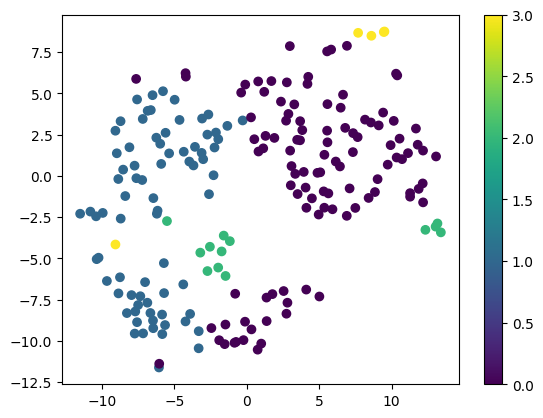

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(stocks_tsne[:, 0], stocks_tsne[:, 1], c=average_records['cluster_label'])
plt.colorbar()

* After analyzing the plot, I notice 2 big clusters
* Although there are 4 clusters in total, only 2 of them seem to be significant in size.
* The colorbar on the right side is telling us that the range of points is 0.3 to 3. Different colors represent the variable's magnitude.
* One thing we need to address is the outliers we can see in the plot. These might be mistakes during data storage or could genuinely be some exceptional cases.


#### Q4: Closing trajectory of stocks on each day highly correlated, 25 pts
- a. Make three plots, 10 pts
- b. permutation test for statistical confidence, p-value, 15 pts


4A

Plot 1

* I will now calculate the closing trajectory of all stocks on a given day.
* I will then calculate the correlation between those closing trajectories.
* If I notice that the closing trajectory is quite high (>0.7), only then I will be convinced that the stock price relies on the market more than on the individual features for that particular stock.

In [88]:
stock_list = np.array(highly_correlated_stocks)

In [89]:
daily_wap = df_without_na[df_without_na['stock_id'].isin(stock_list)].groupby(['stock_id', 'date_id'])['wap'].last().reset_index()

daily_wap['daily_return'] = daily_wap.groupby('stock_id')['wap'].pct_change() * 100

daily_returns = daily_wap.pivot(index='date_id', columns='stock_id', values='daily_return')

correlation_matrix = daily_returns.corr()

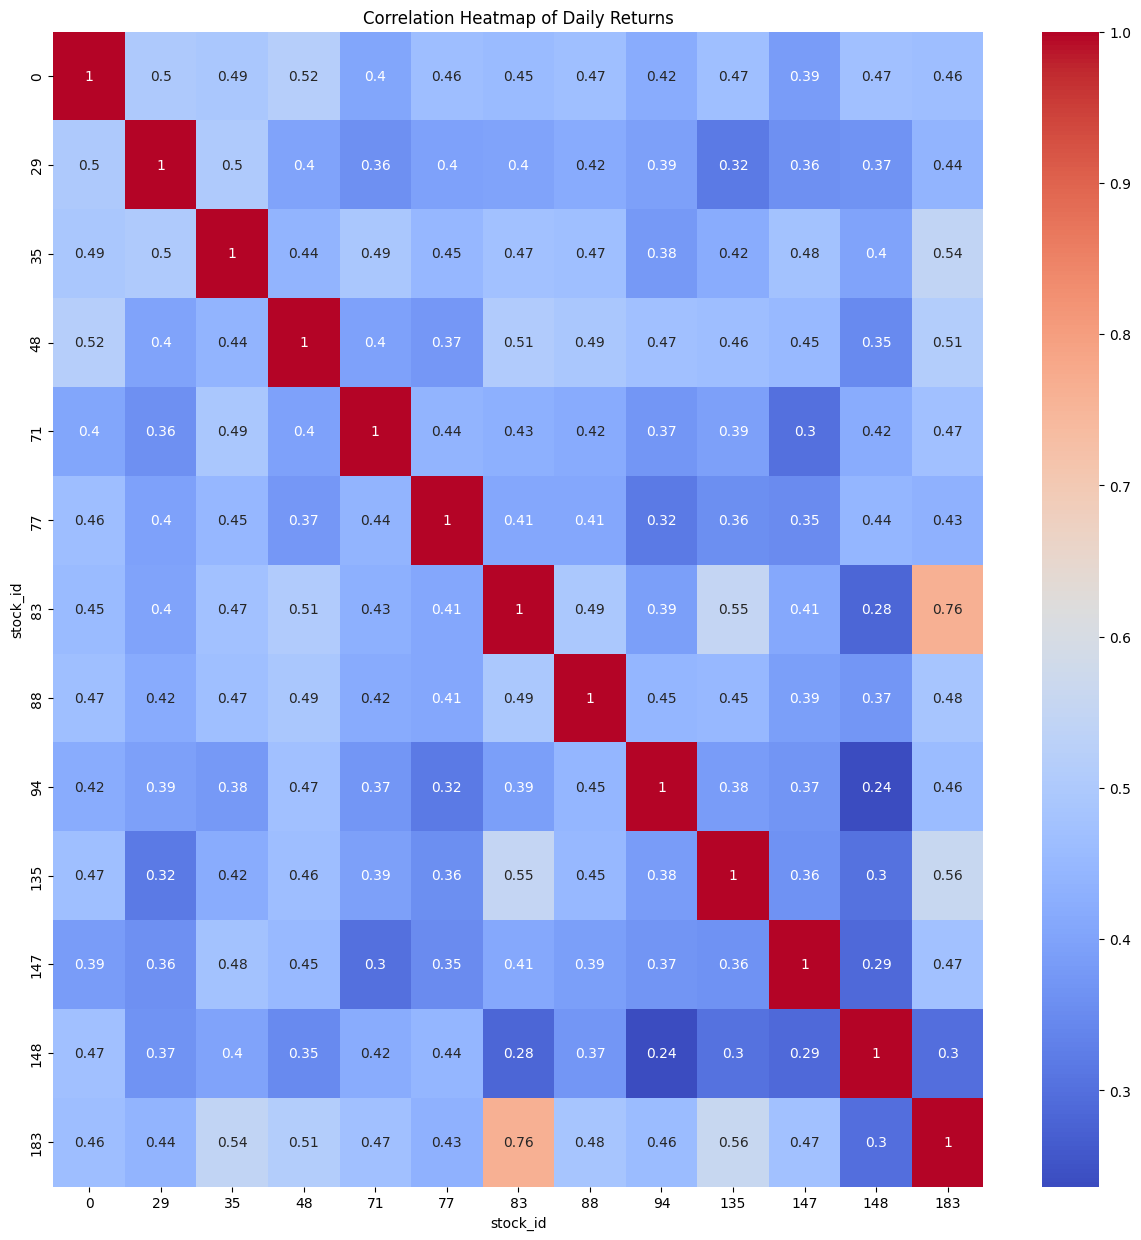

In [90]:
plt.figure(figsize = (15,15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Daily Returns")
plt.show()

* As we can see in the correlation matrix, although most stocks have a somewhat decent positive correlation, I feel that they are not high enough for me to say that all stocks follow similar closing trajectory on most days.

Plot 2

* Now I will calculate the daily returns for all the stocks for a given day.
* As can be clearly seen ,the graph is too noisy to reveal any pattern which would suggest that all stocks have similar closing on a day.

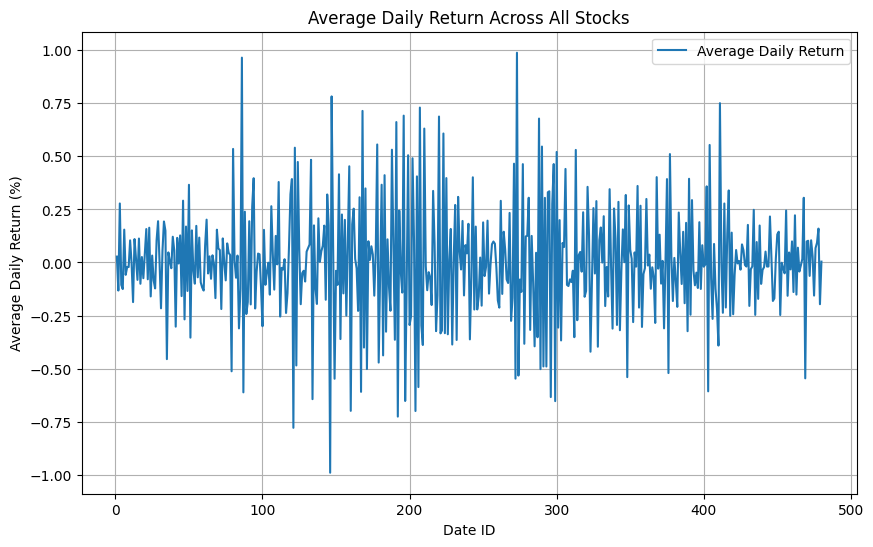

In [91]:
# Calculate the average daily return across all stocks for each day
average_daily_return = daily_returns.mean(axis=1)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(average_daily_return.index, average_daily_return.values, label='Average Daily Return')
plt.xlabel('Date ID')
plt.ylabel('Average Daily Return (%)')
plt.title("Average Daily Return Across All Stocks")
plt.legend()
plt.grid(True)
plt.show()

Plot 3

* I will now try to find see a plot of the autocorr of a random stock to see if we find some pattern.
* We see that autocorr is almost 0.
* This tells me that the losing trajectory of a stock is random as it does not indicate any obvious patter.
* This means that the closing could be based on daily supply and demand.

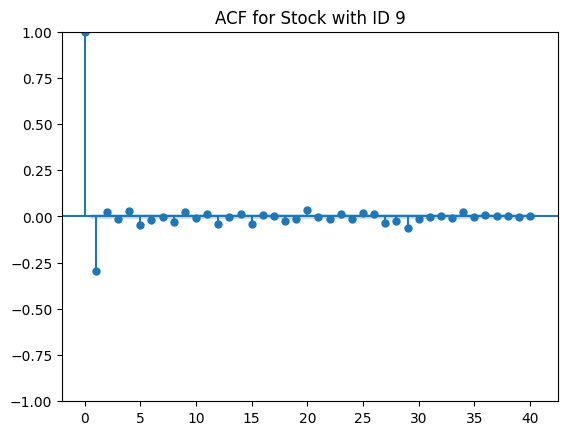

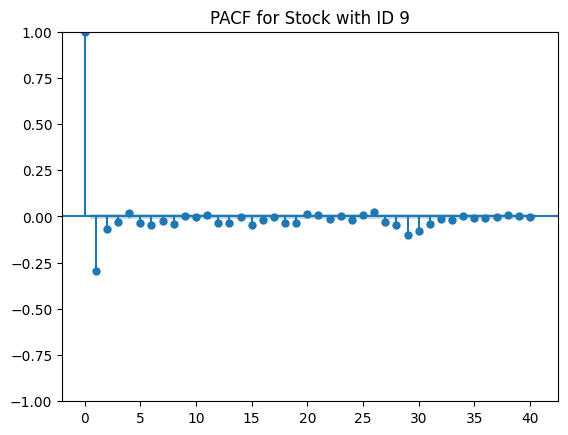

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pandas as pd
import matplotlib.pyplot as plt



# Choose a specific stock, let's say with stock_id = 9
specific_stock_data = df_without_na[df_without_na['stock_id'] == 9]

# Sort the data by date_id
specific_stock_data = specific_stock_data.sort_values('date_id')

# Calculating  daily return for chosen stock
specific_stock_data['daily_return'] = specific_stock_data['wap'].pct_change() * 100

# Drop NA values generated due to pct_change()
specific_stock_data = specific_stock_data.dropna()

stock_data = specific_stock_data['daily_return']


plot_acf(stock_data, lags=40)
plt.title("ACF for Stock with ID 9")
plt.show()


plot_pacf(stock_data, lags=40)
plt.title("PACF for Stock with ID 9")
plt.show()


4B

#### Q5: Best prediction model, any approaches, 25 pts


In [21]:
from sklearn.model_selection import KFold

from sklearn import datasets, linear_model
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, r2_score
from sklearn import model_selection

regr = XGBRegressor()
after300 = df_without_na.copy()

df_without_na = df_without_na.reset_index(drop = True)
X=df_without_na.iloc[:,2:].drop(columns=["target"])
y=df_without_na['target']
mae_scores=[]
mae_rf=[]
kf = KFold(n_splits=5)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]

    # Fit the model on the training data
    regr.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = regr.predict(X_test)

    # Calculate the mean absolute error for this fold
    mae = mean_absolute_error(y_test, y_pred)

    # Append the MAE score to the list of scores
    mae_scores.append(mae)
average_mae = np.mean(mae_scores)
print("Average Mean Absolute Error:", average_mae)


Average Mean Absolute Error: 6.341694107296132


#### Q6: submit model on Kaggle, 0 pts
Public Score: \
Private Score: \
Kaggle profile link: \
Screenshot(s): \
